In [20]:
import pandas as pd
import numpy as np
import re

In [24]:
df= pd.read_csv('new_data_8529.csv', sep='\t', encoding='UTF-8')
# df = df2.loc[df2['대상 선정']=='O',:]

In [25]:
df.columns

Index(['std_clm_type_cd', 'ro_y', 'clm_jgmt_dt', 'ceq_caus_cd', 'ceq_psit_cd',
       'ceq_psit_nm', 'trim_plnt_cd', 'prj_vehl_cd', 'mdl_cd', 'part_sys_cd',
       'repn_part_cd', 'clm_prtl_sbc', '대상 선정', '구분', '책임구', '원인', '검토결과'],
      dtype='object')

In [26]:
df.head(2)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
0               W  2017     20170811         ZZ7         B11  조립 문제_미장착/오장착   
1               W  2018     20180822         ZZ7         B11  조립 문제_미장착/오장착   

  trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
0         KV11          CK     J5          TT        82305   
1         KV11          YP     A9          TT        84211   

                                        clm_prtl_sbc 대상 선정   구분  책임구   원인  \
0  [C] 1.현상:엔진룸 다량의 연료 누유 발생.2.점검:엔진룸 다량의 연료 누유 점...     X  NaN  NaN  NaN   
1                       [C] 1.현상: 리어 도어 앤티 취핑 필림 미장착     X  NaN  NaN  NaN   

   검토결과  
0  X---  
1  X---

In [27]:
df.shape

(8529, 17)

In [28]:
df = df.fillna('N')

userdic = pd.read_csv('usedic2.csv', sep='\t', encoding='UTF-8')
userdic['User Dic.'][0:1]
userdic = userdic.rename(columns = {'User Dic.':'standard'})
userdic = userdic.rename(columns = {'동의어':'missprint'})
userdic = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic.rename(columns = {'User Dic.':'standard'})
userdic_list = userdic.rename(columns = {'동의어':'missprint'})
userdic_list = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic_list.fillna('')
userdic = userdic.fillna('')
replace_word = userdic.iloc[:,1:3]
replace_word = replace_word[replace_word.missprint != '']

In [29]:
replaceword_list =  replace_word['standard'].tolist()
missword_list = replace_word['missprint'].tolist()
print(len(replaceword_list))
print(len(missword_list))

474
474


In [30]:
for i in range(len(replaceword_list)):
    df['clm_prtl_sbc'] = df['clm_prtl_sbc'].replace(missword_list[i],replaceword_list[i],regex=True)
#regex=True 설정을 주면 조사가 붙어있던 말던 단어를 다 바꿔준다.

In [31]:
df.head(2)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
0               W  2017     20170811         ZZ7         B11  조립 문제_미장착/오장착   
1               W  2018     20180822         ZZ7         B11  조립 문제_미장착/오장착   

  trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
0         KV11          CK     J5          TT        82305   
1         KV11          YP     A9          TT        84211   

                                        clm_prtl_sbc 대상 선정 구분 책임구 원인  검토결과  
0  [C] 1.현상:엔진룸 다량의 연료 누유 발생.2.점검:엔진룸 다량의 연료 누유 점...     X  N   N  N  X---  
1                       [C] 1.현상: 리어 도어 안티 치핑 필름 미장착     X  N   N  N  X---

In [33]:
x = df['clm_prtl_sbc']
y = df['대상 선정']

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 157
training_samples = 6800
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)                   # X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(x) # 단어를 숫자인덱스로 변환하여 저장

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았어요.' % len(word_index))

35178개의 고유한 토큰을 찾았어요.


In [43]:
maxlen = 157
training_samples = 6800
validation_samples = 10000
max_words = 10000

tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(y)                   # X의 각 행에 토큰화를 수행
sequences2 = tokenizer2.texts_to_sequences(y) # 단어를 숫자인덱스로 변환하여 저장

word_index2 = tokenizer2.word_index
print('%s개의 고유한 토큰을 찾았어요.' % len(word_index2))

2개의 고유한 토큰을 찾았어요.


In [36]:
word_index

{'c': 1,
 '현상': 2,
 '1': 3,
 '이음': 4,
 '교환': 5,
 '및': 6,
 '점검': 7,
 '도어': 8,
 '작동': 9,
 '불량으로': 10,
 '조치': 11,
 '경고등': 12,
 '리어': 13,
 '주행중': 14,
 '원인': 15,
 '운전석': 16,
 '정상': 17,
 '발생': 18,
 '후': 19,
 '불량': 20,
 '글라스': 21,
 '작동시': 22,
 '프런트': 23,
 '교환후': 24,
 '2': 25,
 '조치내용': 26,
 '확인': 27,
 '3': 28,
 '조수석': 29,
 '점검시': 30,
 '출고': 31,
 '시운전': 32,
 '우측': 33,
 '발생으로': 34,
 '슬라이딩': 35,
 '스위치': 36,
 '차량': 37,
 '점검결과': 38,
 '인한': 39,
 '입고': 40,
 '좌측': 41,
 '점검내용': 42,
 '출고함': 43,
 '입고2': 44,
 '내부': 45,
 '브레이크': 46,
 '단차': 47,
 '이음발생': 48,
 '센서': 49,
 '주행시': 50,
 '결과': 51,
 '배선': 52,
 '점등': 53,
 '테일게이트게이트': 54,
 '간헐적': 55,
 '어셈블리리': 56,
 '슬라이딩도어': 57,
 '이음으로': 58,
 '엔진': 59,
 '이상': 60,
 '좌': 61,
 '커버': 62,
 '수정': 63,
 '교환함': 64,
 '커넥터': 65,
 '트림': 66,
 '발생됨': 67,
 '이음이': 68,
 '핸들': 69,
 '상기': 70,
 '와이퍼': 71,
 '확인시': 72,
 '시트': 73,
 '양쪽': 74,
 '조정': 75,
 '점등으로': 76,
 '시운전시': 77,
 '우': 78,
 '4': 79,
 '없음': 80,
 '인하여': 81,
 '조치함': 82,
 '이음발생으로': 83,
 '미러': 84,
 '글라스런': 85,
 '간헐적으로': 86,
 '모듈'

In [37]:
word_index2

{'x': 1, 'o': 2}

In [44]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = pad_sequences(sequences2, maxlen=maxlen)

In [45]:
# labels = np.asarray(y)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

데이터 텐서의 크기: (8529, 157)
레이블 텐서의 크기: (8529, 157)


In [46]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6800, 157)
(6800, 157)
(1729, 157)
(1729, 157)


In [48]:
print(x_train)
print(y_train)
print(x_val)
print(y_val)

[[   0    0    0 ...    2  763  919]
 [   0    0    0 ...    7 6612   64]
 [   0    0    0 ...    3 4690   64]
 ...
 [   0    0    0 ...   77  325  211]
 [   0    0    0 ...  851  705    5]
 [   0    0    0 ...  259    5   41]]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
[[   0    0    0 ...   28  502    5]
 [   0    0    0 ...  518 1200 3835]
 [   0    0    0 ...    5   19   17]
 ...
 [   0    0    0 ... 3655  747  163]
 [   0    0    0 ...  190   84    5]
 [   0    0    0 ...  252 8075   31]]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [49]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
embedding_dim = 157
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(157, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 157, 157)          1570000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 24649)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                788800    
_________________________________________________________________
dense_2 (Dense)              (None, 157)               5181      
Total params: 2,363,981
Trainable params: 2,363,981
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))
model.save_weights('pre_trained_model.h5')

Instructions for updating:
Use tf.cast instead.
Train on 6800 samples, validate on 1729 samples
Epoch 1/10
6800/6800 [==============================] - 10s 2ms/step - loss: 0.0174 - acc: 0.9732 - val_loss: -0.0343 - val_acc: 0.9978
Epoch 2/10
6800/6800 [==============================] - 10s 2ms/step - loss: -0.0363 - acc: 0.9977 - val_loss: -0.0343 - val_acc: 0.9978
Epoch 3/10
6800/6800 [==============================] - 11s 2ms/step - loss: -0.0363 - acc: 0.9977 - val_loss: -0.0343 - val_acc: 0.9978
Epoch 4/10
6800/6800 [==============================] - 12s 2ms/step - loss: -0.0363 - acc: 0.9977 - val_loss: -0.0343 - val_acc: 0.9978
Epoch 5/10
6800/6800 [==============================] - 11s 2ms/step - loss: -0.0363 - acc: 0.9977 - val_loss: -0.0343 - val_acc: 0.9978
Epoch 6/10
6800/6800 [==============================] - 10s 2ms/step - loss: -0.0363 - acc: 0.9977 - val_loss: -0.0343 - val_acc: 0.9978
Epoch 7/10
6800/6800 [==============================] - 10s 1ms/step - loss: -0.036

In [51]:
import matplotlib.pyplot as plt

In [52]:
print(history.history['acc'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['val_loss'])

[0.973200622586643, 0.9977257218080409, 0.9977257229300106, 0.9977257229300106, 0.9977257232105031, 0.9977257234909955, 0.9977257192836089, 0.9977257204055786, 0.9977257241922266, 0.9977257243324729]
[0.9978485923753853, 0.9978485923753853, 0.9978485923753853, 0.9978485923753853, 0.9978485923753853, 0.9978485923753853, 0.9978485923753853, 0.9978485923753853, 0.9978485923753853, 0.9978485923753853]
[0.017363596650607445, -0.03625646722229088, -0.036256984332028556, -0.03625701842062613, -0.03625702472294078, -0.03625702664256096, -0.03625702759360566, -0.0362570281107636, -0.03625702857532922, -0.036257028737488914]
[-0.03429777506483193, -0.03429811332183829, -0.03429811418367526, -0.03429811425262221, -0.03429811425262221, -0.03429811425262221, -0.03429811425262221, -0.03429811425262221, -0.03429811425262221, -0.03429811425262221]


<Figure size 432x288 with 0 Axes>

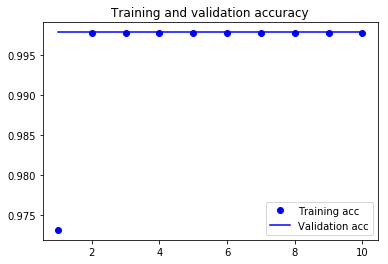

<Figure size 432x288 with 0 Axes>

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

<Figure size 432x288 with 0 Axes>

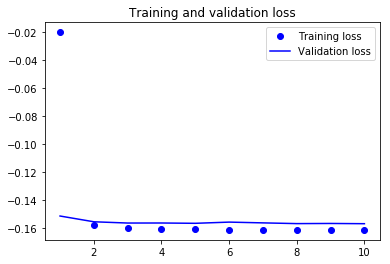

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

In [24]:
model.load_weights('pre_trained_model.h5')
model.evaluate(x_val, y_val)

312/312 [==============================] - 0s 228us/step


[-0.1570959809498909, 0.9933651273067181]